# Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import warnings
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings("ignore")

# Читаем изначальные файлы из папки

In [90]:
data = pd.read_csv(f"D:\Аспирантура\\altai\\input_rivers.csv", sep=";")
names = pd.read_csv(f"D:\Аспирантура\\altai\\stations.csv", sep=";")

# Замена запятых на точки во всем массиве данных

In [119]:
for i in data:
    (i.values[0]).replace(',', '.')
(data['q'].values[0]).replace(',', '.')

'1.42'

In [113]:
data

,date,index_hydro,q,t,p
0,1940-01-01 00:00:00 UTC,10108,"1,42",NaN,NaN
1,1940-01-02 00:00:00 UTC,10108,"1,66",NaN,NaN
2,1940-01-03 00:00:00 UTC,10108,"1,5",NaN,NaN
3,1940-01-04 00:00:00 UTC,10108,"1,66",NaN,NaN
4,1940-01-05 00:00:00 UTC,10108,"1,62",NaN,NaN
...,...,...,...,...,...
66393,2020-12-27 00:00:00 UTC,10144,"2,85","-40,025",0
66394,2020-12-28 00:00:00 UTC,10144,"2,86","-30,675",0
66395,2020-12-29 00:00:00 UTC,10144,"2,88","-24,6",0
66396,2020-12-30 00:00:00 UTC,10144,"2,89","-14,675","0,6"


# Сохранение массивов в отдельные файлы для обработки в R

In [65]:
for index in names['index']:
    data1 = data.loc[data['index_hydro'] == index]
    data1.drop(columns=['index_hydro'], inplace=True)
    data1.to_csv(f"D:/Аспирантура/altai/{names.loc[names['index']==index]['v_obj'].values[0]}.csv", sep=";", index=None)

In [94]:
def rename_index(df):
    index_old_name = df['index_hydro'].unique()[0]
    df['index_hydro'] = names.loc[names['index']==index_old_name]['v_obj'].values[0]
    return df

new_data = data.groupby('index_hydro').apply(rename_index).reset_index(drop=True)

for index in new_data['index_hydro'].unique():
    data1 = new_data.loc[new_data['index_hydro'] == index]
    data1.drop(columns=['index_hydro'], inplace=True)
    print(data1.dtypes)
    data1.to_csv(f"D:/Аспирантура/altai/{index}.csv", sep=";", index=None)

date    object
q       object
t       object
p       object
dtype: object
date    object
q       object
t       object
p       object
dtype: object
date    object
q       object
t       object
p       object
dtype: object
date    object
q       object
t       object
p       object
dtype: object
date    object
q       object
t       object
p       object
dtype: object


# Считывание готовых массивов с подземным стоком

In [2]:
data_alambai = pd.read_csv(f"D:\\Аспирантура\\altai\\alambai_kudelin.csv", sep=",")
data_bolshaya = pd.read_csv(f"D:\\Аспирантура\\altai\\bolshaya_kudelin.csv", sep=",")
data_locktevka = pd.read_csv(f"D:\\Аспирантура\\altai\\locktevka_kudelin.csv", sep=",")
data_maima = pd.read_csv(f"D:\\Аспирантура\\altai\\maima_kudelin.csv", sep=",")
data_belaya = pd.read_csv(f"D:\\Аспирантура\\altai\\Белая_kudelin.csv", sep=",")

list_of_rivers = [data_alambai, data_bolshaya, data_locktevka, data_maima, data_belaya]

In [3]:
data_belaya

,Unnamed: 0,Date,Q,Temp,Prec,Qbase,Quick,Qspri,Qrain,Qthaw,Season,Year
0,1,1987-01-01,3.10,-12.1000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1987-01-02,3.08,-3.8000,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1987-01-03,3.06,-7.8000,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1987-01-04,3.04,-6.6000,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1987-01-05,3.02,-10.7000,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12414,12415,2020-12-27,8.62,-34.1875,0.0,8.62,0.0,0.0,0.0,0.0,2.0,2020.0
12415,12416,2020-12-28,8.28,-26.9375,0.0,8.28,0.0,0.0,0.0,0.0,2.0,2020.0
12416,12417,2020-12-29,7.95,-18.0750,0.0,7.95,0.0,0.0,0.0,0.0,2.0,2020.0
12417,12418,2020-12-30,7.61,-10.9125,4.0,7.61,0.0,0.0,0.0,0.0,2.0,2020.0


# Перводим дату в формат даты

In [4]:
for river in list_of_rivers:
    river['Date'] = pd.to_datetime(river['Date'], format = "%Y-%m-%d", dayfirst = True)
    print(river.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12419 entries, 0 to 12418
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  12419 non-null  int64         
 1   Date        12419 non-null  datetime64[ns]
 2   Q           9617 non-null   float64       
 3   Temp        9617 non-null   float64       
 4   Prec        9617 non-null   float64       
 5   Qbase       8840 non-null   float64       
 6   Quick       8758 non-null   float64       
 7   Qspri       8758 non-null   float64       
 8   Qrain       8840 non-null   float64       
 9   Qthaw       8841 non-null   float64       
 10  Season      8842 non-null   float64       
 11  Year        8842 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 1.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12419 entries, 0 to 12418
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dt

# Функция для построения и сохранения графиков (наду улучшить чтобы не требовалось вводить год)

In [5]:
def yearly_plot_k(year, df, path_to_folders, name):
    if len(df[df['Date'].dt.year == year]) > 0:
        plt.figure(figsize=(15, 5))
        plt.plot(df[df['Date'].dt.year == year].set_index(df[df['Date'].dt.year == year]["Date"])["Q"])
        plt.plot(df[df['Date'].dt.year == year].set_index(df[df['Date'].dt.year == year]["Date"])["Qbase"])
        # figsize = (20,35)
        plt.ylabel('Расход, м3/с')
        plt.xlabel(str(year) + " год")
        plt.legend(["Общий сток", "Подземный сток"])
        plt.savefig(f'{path_to_folders}/{name}/{year}.png')


# Сохраняем и радуемся результату

In [ ]:
path_to_folders = 'D:/Аспирантура/altai/plots'

if os.path.isdir(path_to_folders) == False:
    os.mkdir(path_to_folders)

for river, name in zip(list_of_rivers,
                ['Аламбай', 'Большая Речка', 'Локтевка', 'Майма', 'Белая']):

    if os.path.isdir(f'{path_to_folders}/{name}') == False:
        os.mkdir(f'{path_to_folders}/{name}')

    for year in range(1940, 2021):
        yearly_plot_k(year, river, path_to_folders, name)

# Функция осреднения стока и подземного стока за год

In [5]:
# тут список начиная с минимального года исследования
years_all=[i for i in range(1960,2022)]

In [132]:
def result_table_k(df, years):
    mean_list=[]
    mean_list_base=[]
    mean_list_p=[]
    mean_list_t=[]
    sum_list_base= []
    sum_list_p = []
    sum_list_t = []
    for year in years:
        mean_list.append(round(df[df['Date'].dt.year == year]["Q"].mean(), 2))
        mean_list_base.append(round(df[df['Date'].dt.year == year]["Qbase"].mean(), 2))
        mean_list_p.append(round(df[df['Date'].dt.year == year]["Prec"].mean(), 2))
        mean_list_t.append(round(df[df['Date'].dt.year == year]["Temp"].mean(), 2))
        sum_list_base.append(round(df[df['Date'].dt.year == year]["Qbase"].sum(), 2))
        sum_list_p.append(round(df[df['Date'].dt.year == year]["Prec"].sum(), 2))
        sum_list_t.append(round(df[df['Date'].dt.year == year]["Temp"].sum(), 2))
       
    result_df =pd.DataFrame([years, mean_list, mean_list_base, mean_list_p, mean_list_t, sum_list_base , sum_list_p, sum_list_t], index=['years', 'mean_q','mean_base', 'mean_p', 'mean_t', 'sum_base','sum_p', 'sum_t']).T
    return result_df

data = result_table_k(data_maima, years_all)
data.set_index(data['years'],inplace=True)

In [38]:
data

,years,mean_q,mean_base,mean_p,mean_t,sum_base,sum_p
years,,,,,,,
1960.0,1960.0,NaN,NaN,NaN,NaN,0.00,0.0
1961.0,1961.0,NaN,NaN,NaN,NaN,0.00,0.0
1962.0,1962.0,7.36,1.92,NaN,NaN,574.16,0.0
1963.0,1963.0,NaN,NaN,NaN,NaN,0.00,0.0
1964.0,1964.0,5.29,2.71,NaN,NaN,724.56,0.0
...,...,...,...,...,...,...,...
2017.0,2017.0,11.06,5.14,2.24,7.55,1877.74,646.0
2018.0,2018.0,8.42,4.69,2.01,3.90,1712.08,672.8
2019.0,2019.0,8.20,6.37,2.22,3.45,2316.96,809.1


# Функция для визуализации среднегодового подземного стока

In [15]:
def mean_baseflow(df):
    plt.figure(figsize=(15, 6))
    plt.plot(df['mean_base'], 'b')
    #plt.plot(df['mean_base'].rolling(window=5).mean(), color='orchid')
    #plt.legend(["Общий сток", "Подземный сток", 'Тренд среднегодового стока', 'Tренд среднегодового подземного стока' ], loc='upper left')
    plt.legend(["Подземный сток", "Тенденция изменения"], loc='upper left')
    plt.ylabel('Расход, м3/с')
    plt.xlabel("Год")

# Функция для визуализации среднегодовых суточных осадков

In [14]:
def mean_p(df):
    plt.figure(figsize=(15, 6))
    plt.plot(df['mean_p'], 'b')
    plt.plot(df['mean_p'], 'r.')

    small_df = df.dropna()
    x = small_df['years'].values
    y = small_df['mean_p'].values
    
    #calculate equation for quadratic trendline
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    #add trendline to plot
    plt.plot(x, p(x))

    # plt.plot(df['mean_t'].fillna(method='ffill').rolling(window=7).mean(), color='orchid')
    #plt.legend(["Общий сток", "Подземный сток", 'Тренд среднегодового стока', 'Tренд среднегодового подземного стока' ], loc='upper left')
    plt.legend(["Осадки", "Имеющиеся данные", "Полиномиальный тренд"], loc='upper left')
    plt.ylabel('Осадки, мм/сут')
    plt.xlabel("Год")

# Функция для визуализации среднегодовых среднесуточных температур

In [13]:
def mean_t(df):
    plt.figure(figsize=(15, 6))
    plt.plot(df['mean_t'], 'b')
    plt.plot(df['mean_t'], 'r.')

    small_df = df.dropna()
    x = small_df['years'].values
    y = small_df['mean_t'].values
    
    #calculate equation for quadratic trendline
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    #add trendline to plot
    plt.plot(x, p(x))

    # plt.plot(df['mean_t'].fillna(method='ffill').rolling(window=7).mean(), color='orchid')
    #plt.legend(["Общий сток", "Подземный сток", 'Тренд среднегодового стока', 'Tренд среднегодового подземного стока' ], loc='upper left')
    plt.legend(["Температура", "Имеющиеся данные", "Полиномиальный тренд"], loc='upper left')
    plt.ylabel('Температура, Градусы')
    plt.xlabel("Год")

In [11]:
for river in list_of_rivers:
    data = result_table_k(river, years_all)
    data.set_index(data['years'],inplace=True)
    print(data['mean_q'])
    print(' ')
    # mean_baseflow(data)

years
1987.0    11.13
1988.0    11.84
1989.0    11.58
1990.0     7.40
1991.0     7.07
1992.0     9.60
1993.0    12.53
1994.0    10.44
1995.0    10.45
1996.0     9.35
1997.0    10.48
1998.0     8.04
1999.0     9.32
2000.0     8.86
2001.0    13.60
2002.0      NaN
2003.0      NaN
2004.0      NaN
2005.0      NaN
2006.0      NaN
2007.0      NaN
2008.0     6.67
2009.0     7.94
2010.0    11.57
2011.0    10.08
2012.0     4.65
2013.0    14.85
2014.0    10.98
2015.0    21.33
2016.0    15.12
2017.0    17.17
2018.0    14.15
2019.0      NaN
2020.0    13.47
2021.0      NaN
Name: mean_q, dtype: float64
 
years
1987.0    3.27
1988.0    4.62
1989.0    4.45
1990.0    3.95
1991.0    4.45
1992.0    3.89
1993.0    5.21
1994.0    3.92
1995.0    4.15
1996.0    3.77
1997.0    3.92
1998.0    3.08
1999.0    4.92
2000.0    3.88
2001.0    3.68
2002.0     NaN
2003.0     NaN
2004.0     NaN
2005.0     NaN
2006.0     NaN
2007.0     NaN
2008.0    3.57
2009.0    3.94
2010.0    5.93
2011.0    4.66
2012.0    2.41
2013.0 

# Убираем три сигмы

In [8]:
def cut_df(df: "pd.DataFrame", cols: list) -> "pd.DataFrame":
    """The function cut 1% of data and fit new min and max values.

    Args:
        df (pd.DataFrame): initial df.
        cols (list): list with params for cut outliers.

    Returns:
        pd.DataFrame: result df without outliers.
    """
    desc = df[cols].describe()

    # cut params data
    df1 = df[cols].clip(
        lower=df[cols].quantile(0.03), upper=df[cols].quantile(0.99), axis=1
    )
    desc1 = df1[cols].describe()

    # change outliers values to min and max
    for col in cols:
        # min
        if desc[col][3] != desc1[col][3]:
            df.loc[df[col] < desc1[col][3], col] = desc1[col][3]

        # max
        if desc[col][-1] != desc1[col][-1]:
            df.loc[df[col] > desc1[col][-1], col] = desc1[col][-1]

    return df

In [26]:
data

,years,mean_q,mean_base,mean_p,mean_t,sum_list_base,sum_list_p
years,,,,,,,
1960.0,1960.0,NaN,NaN,NaN,NaN,0.00,0.0
1961.0,1961.0,NaN,NaN,NaN,NaN,0.00,0.0
1962.0,1962.0,7.36,1.92,NaN,NaN,574.16,0.0
1963.0,1963.0,NaN,NaN,NaN,NaN,0.00,0.0
1964.0,1964.0,5.29,2.71,NaN,NaN,724.56,0.0
...,...,...,...,...,...,...,...
2017.0,2017.0,11.06,5.14,2.24,7.55,1877.74,646.0
2018.0,2018.0,8.42,4.69,2.01,3.90,1712.08,672.8
2019.0,2019.0,8.20,6.37,2.22,3.45,2316.96,809.1


# расчет для Маймы

In [39]:
data = result_table_k(data_maima, years_all)
data.set_index(data['years'],inplace=True)

# Температура

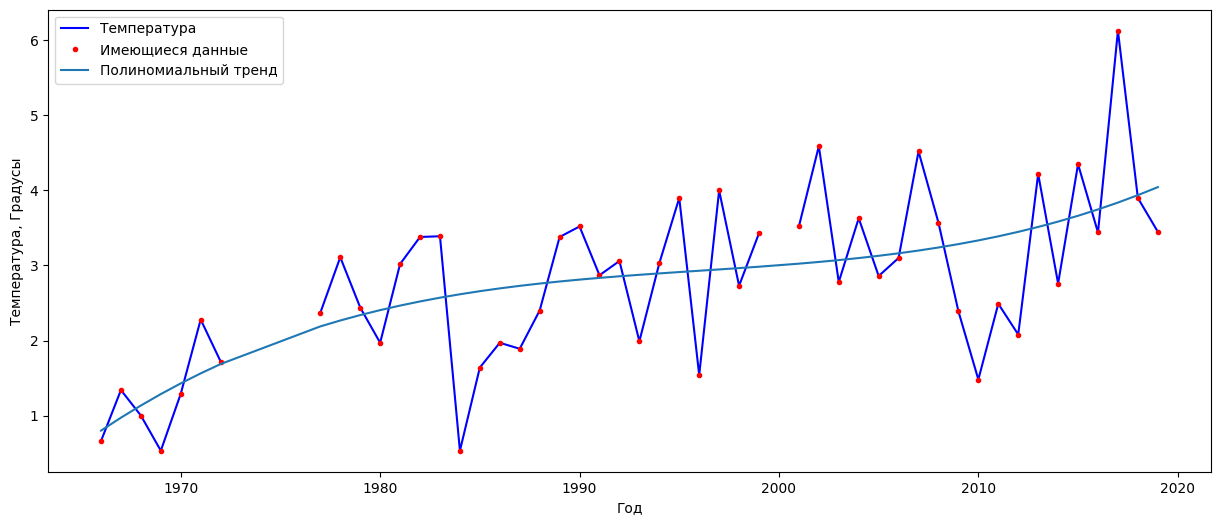

In [17]:
# for river in list_of_rivers:
# data = result_table_k(data, years_all)
data.set_index(data['years'],inplace=True)
cut_data = cut_df(data, data.columns[1:])
# print(data['mean_base'])
# print(' ')
mean_t(cut_data)

# Осадки

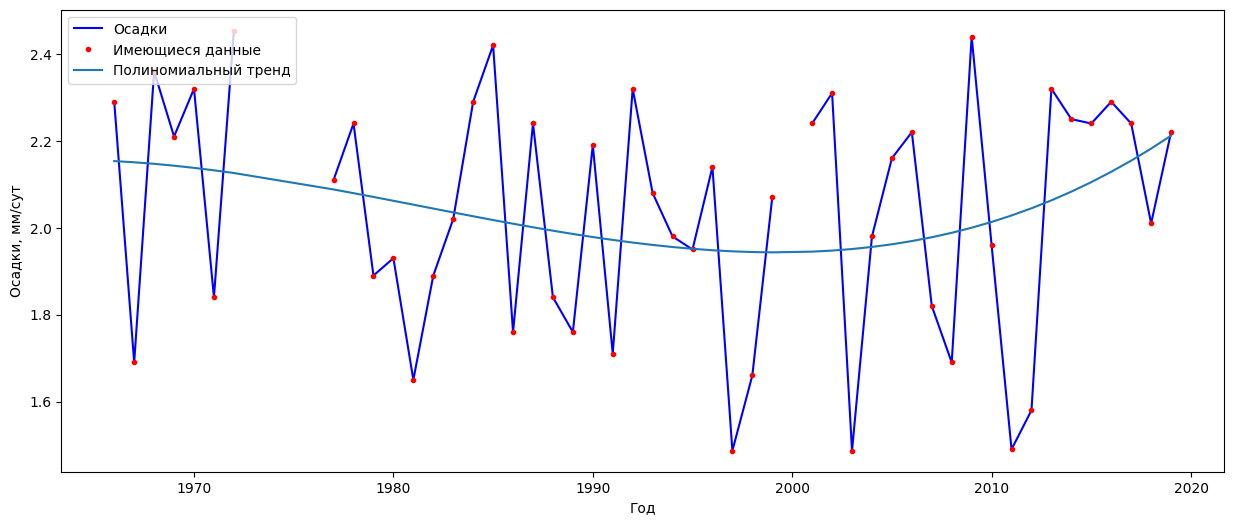

In [18]:
# for river in list_of_rivers:
# data = result_table_k(data, years_all)
data.set_index(data['years'],inplace=True)
cut_data = cut_df(data, data.columns[1:])
# print(data['mean_base'])
# print(' ')
mean_p(cut_data)

# Расчет среденегодовых графиков для остальных рек

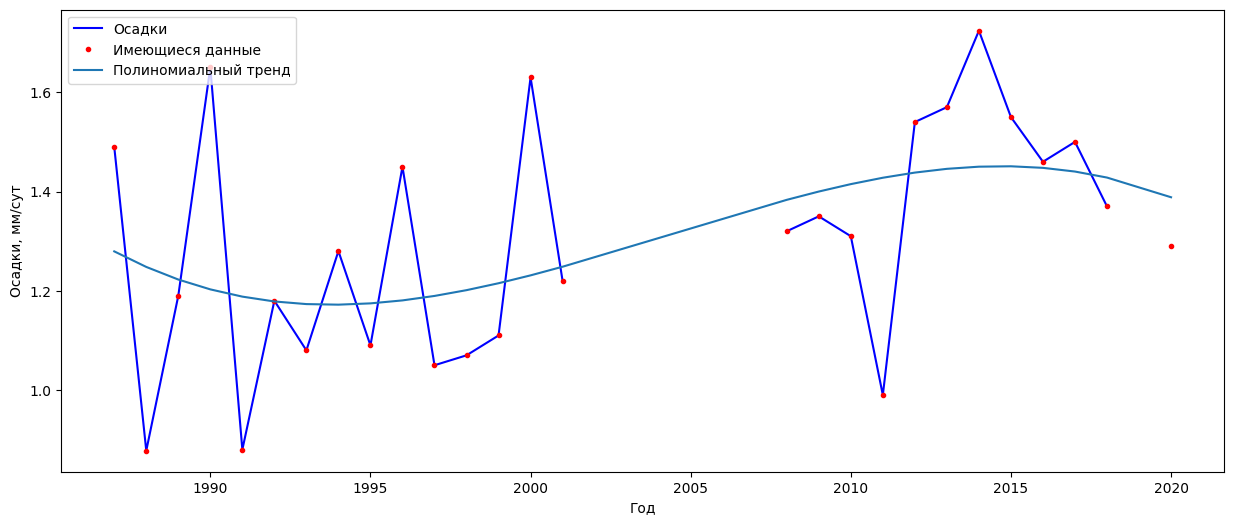

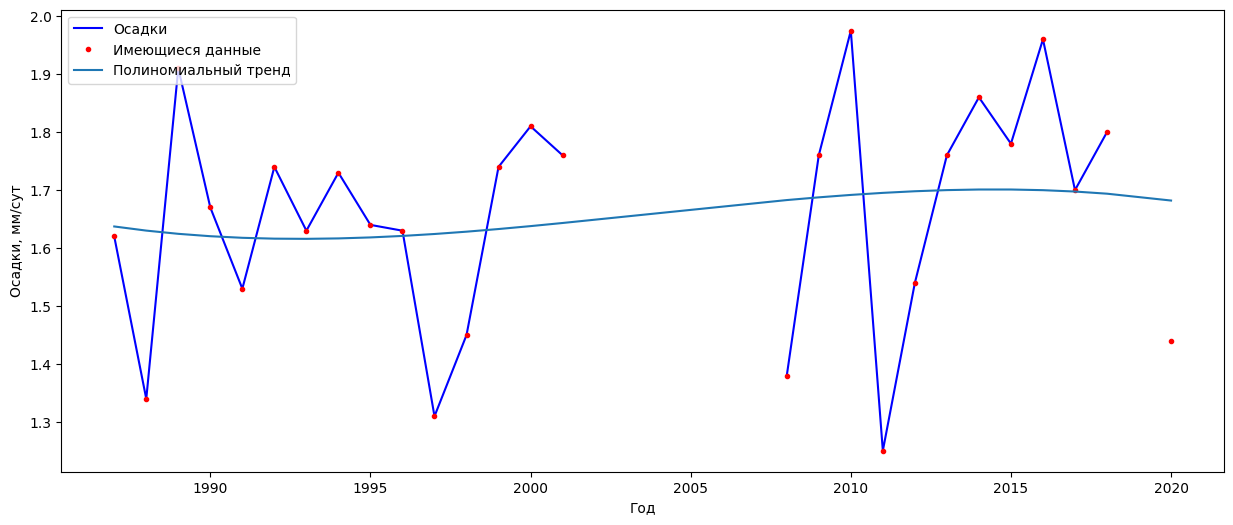

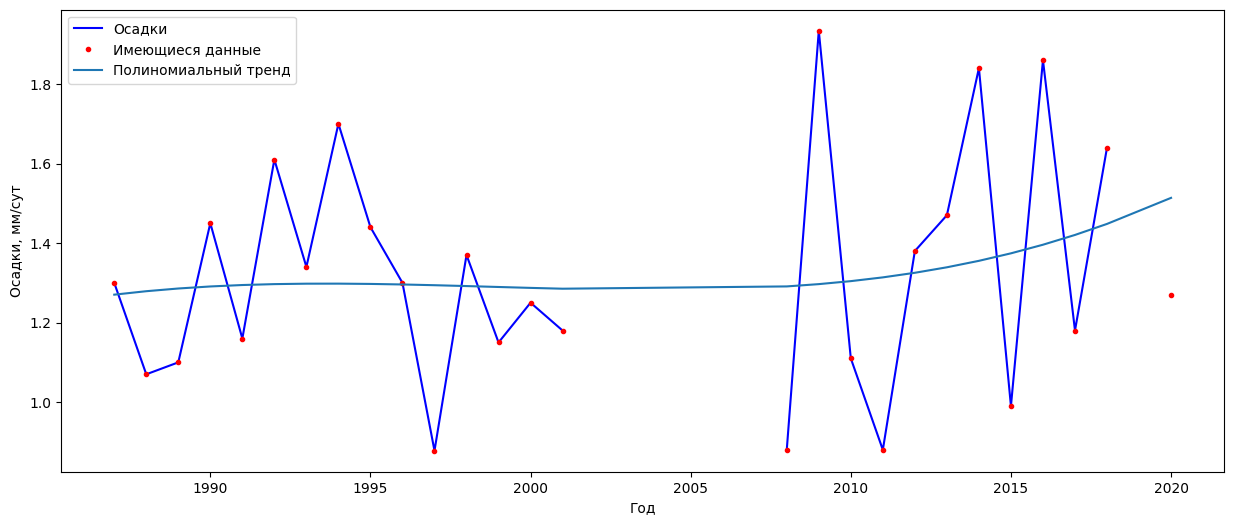

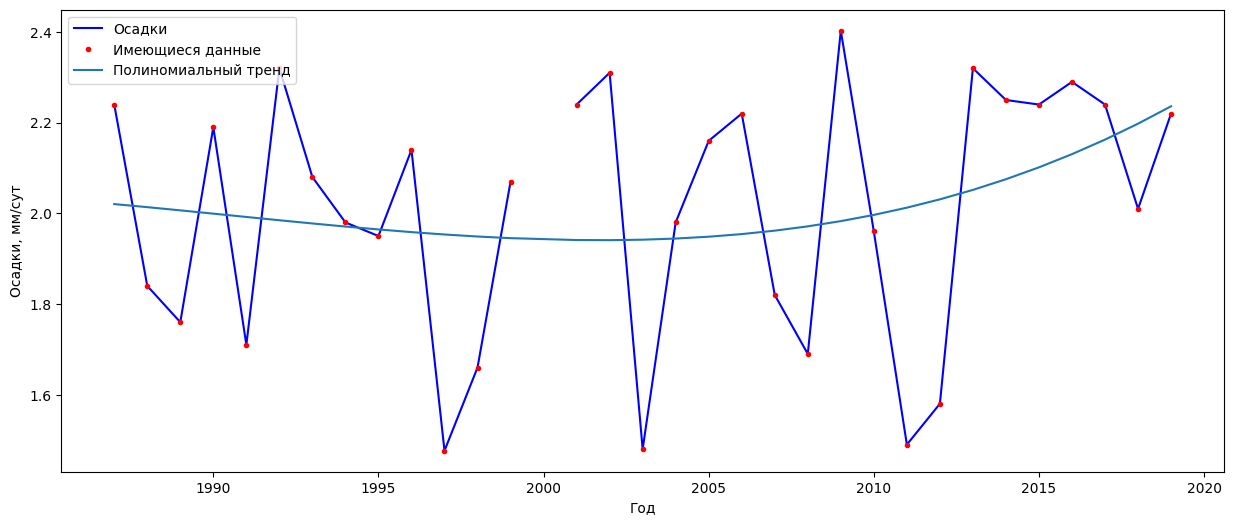

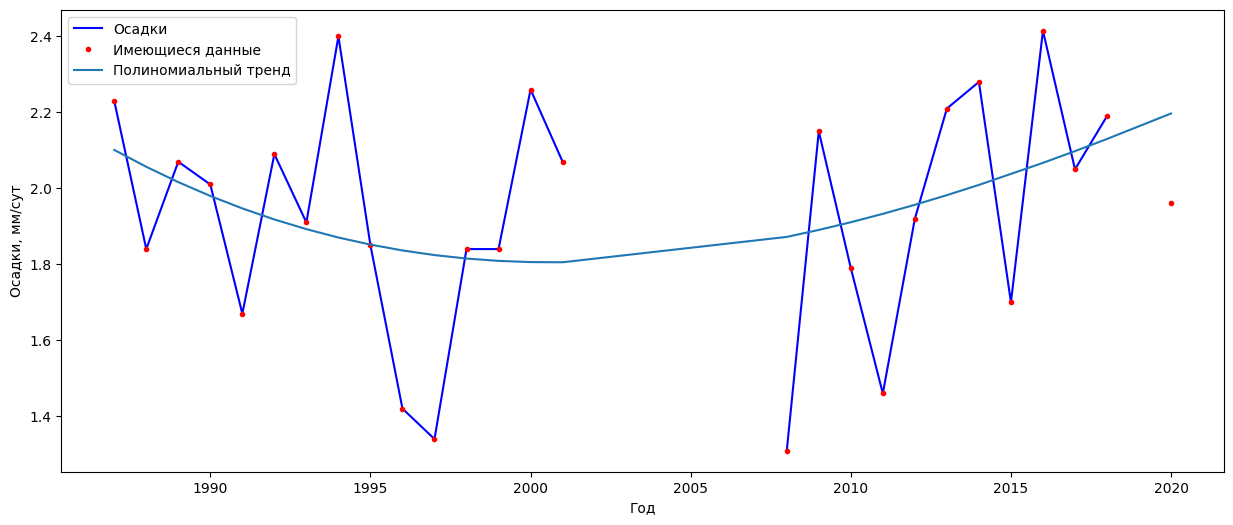

In [110]:
for river in list_of_rivers:
    data = result_table_k(river, years_all)
    data.set_index(data['years'],inplace=True)
    cut_data = cut_df(data, data.columns[1:])
    # print(data['mean_base'])
    # print(' ')
    mean_p(cut_data)

# Статистический анализ данных

In [180]:
data = result_table_k(data_maima, years_all)
data.set_index(data['years'],inplace=True)

In [181]:
data = data.dropna()
data.describe()

,years,mean_q,mean_base,mean_p,mean_t,sum_base,sum_p,sum_t
count,49.000000,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1993.816327,8.24551,4.239592,2.034898,2.763265,1532.527143,735.924490,992.062653
std,15.596038,2.14742,1.545809,0.278060,1.327790,571.806549,101.924677,444.404621
min,1966.000000,2.31000,0.420000,1.430000,-1.030000,36.670000,521.200000,-371.300000
25%,1982.000000,6.84000,3.270000,1.840000,1.970000,1191.730000,665.400000,721.800000
50%,1994.000000,8.27000,4.190000,2.080000,2.860000,1528.420000,756.700000,1045.400000
75%,2007.000000,9.67000,5.210000,2.240000,3.450000,1877.740000,819.300000,1260.200000
max,2019.000000,12.82000,7.860000,2.490000,7.550000,2875.040000,901.000000,2181.100000


# Корреляция между суммой осадков и подземного стока

Пирсона

In [182]:

data[['sum_base', 'mean_t']].corr(method='pearson')

,sum_base,mean_t
sum_base,1.000000,0.078165
mean_t,0.078165,1.000000


Спирмена

In [183]:

data[['sum_base', 'mean_t']].corr(method='spearman')

,sum_base,mean_t
sum_base,1.000000,0.131136
mean_t,0.131136,1.000000


# Регрессия

## C стандартизацией данных

In [83]:
from sklearn.preprocessing import StandardScaler

data_0 = data['sum_base'].values.reshape(-1, 1)
scaler = StandardScaler()
scaler.fit(data_0)

x = scaler.transform(data_0)

In [84]:
data_1 = data['sum_p'].values.reshape(-1, 1)
scaler1 = StandardScaler()
scaler1.fit(data_1)

y = scaler1.transform(data_1)

In [85]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.21908608472523905


## Без страндартизации данных

In [157]:

data = data.dropna()

x = np.array(data['sum_base']).reshape((-1, 1))
y = np.array(data['sum_t'])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.03955806052954092


# Корреляция линейных рядов с лагом для проверки отстования зависимости рядов

In [158]:
import statsmodels.api as sm

#calculate cross correlation
corr = list(sm.tsa.stattools.ccf(x, y, adjusted=False))
corr

[0.19889208262155847,
 -0.2981122265975486,
 0.1515053755010199,
 -0.10663693319439496,
 -0.2029100729601094,
 0.06775616622828506,
 -0.04910258140219963,
 -0.047851125497070206,
 0.0753088477415533,
 -0.13842417296816734,
 0.1852668927414564,
 -0.13529060185586356,
 0.12159785782304484,
 0.0459321519715334,
 -0.2521409652212861,
 0.4519849903629155,
 -0.21491591855016887,
 -0.053815598941975046,
 0.10428955068732977,
 -0.03534723608761463,
 0.09494803615593676,
 -0.03828036455941203,
 -0.10532116070161125,
 0.020070618907946893,
 0.04462478237157032,
 -0.02870908836556675]